# PREDICTING HOMELESSNESS IN AMERICA


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import plotly_express as px

# EDA  and Feature Engineering

In [2]:
df = pd.read_csv('feature_eng_data.csv')

In [3]:
df.head()

,Unnamed: 0,state,number,year,population,renter_occupied_households,eviction_filings,evictions,total_ssi,aged_ssi,...,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,homeless_count,smha_per_capita,mental_health_budget
0,0,alabama,AL-500,2007,845208,104742,3203,656,25480,1839,...,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2104,74.0,62545392
1,1,alabama,AL-500,2008,845208,105612,2172,976,25762,1722,...,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2104,79.0,66771432
2,2,alabama,AL-500,2009,845208,106482,1785,945,26244,1615,...,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2273,78.0,65926224
3,3,alabama,AL-500,2010,853551,107353,2486,1605,27098,1525,...,26.20,4.90,0.22,1.64,0.02,0.99,0.10,2273,78.0,66576978
4,4,alabama,AL-500,2011,862556,108846,3708,2257,27532,1459,...,26.95,4.82,0.23,1.80,0.02,1.10,0.16,1950,78.0,67279368


In [4]:
df.drop(['Unnamed: 0','state','number','year'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 30 columns):
population                    3203 non-null int64
renter_occupied_households    3203 non-null int64
eviction_filings              3203 non-null int64
evictions                     3203 non-null int64
total_ssi                     3203 non-null int64
aged_ssi                      3203 non-null int64
disbl_ssi                     3203 non-null int64
18_und_ssi                    3203 non-null int64
18_64_ssi                     3203 non-null int64
65_ovr_ssi                    3203 non-null int64
poverty_rate                  3203 non-null float64
median_gross_rent             3203 non-null float64
median_household_income       3203 non-null float64
median_property_value         3203 non-null float64
avg_rent_burden               3203 non-null float64
eviction_rate                 3203 non-null float64
eviction_filing_rate          3203 non-null float64
unemploy_rate                

In [6]:
df.isnull().any()

population                    False
renter_occupied_households    False
eviction_filings              False
evictions                     False
total_ssi                     False
aged_ssi                      False
disbl_ssi                     False
18_und_ssi                    False
18_64_ssi                     False
65_ovr_ssi                    False
poverty_rate                  False
median_gross_rent             False
median_household_income       False
median_property_value         False
avg_rent_burden               False
eviction_rate                 False
eviction_filing_rate          False
unemploy_rate                 False
pct_renter_occupied           False
pct_white                     False
pct_af_am                     False
pct_hispanic                  False
pct_am_ind                    False
pct_asian                     False
pct_nh_pi                     False
pct_multiple                  False
pct_other                     False
homeless_count              

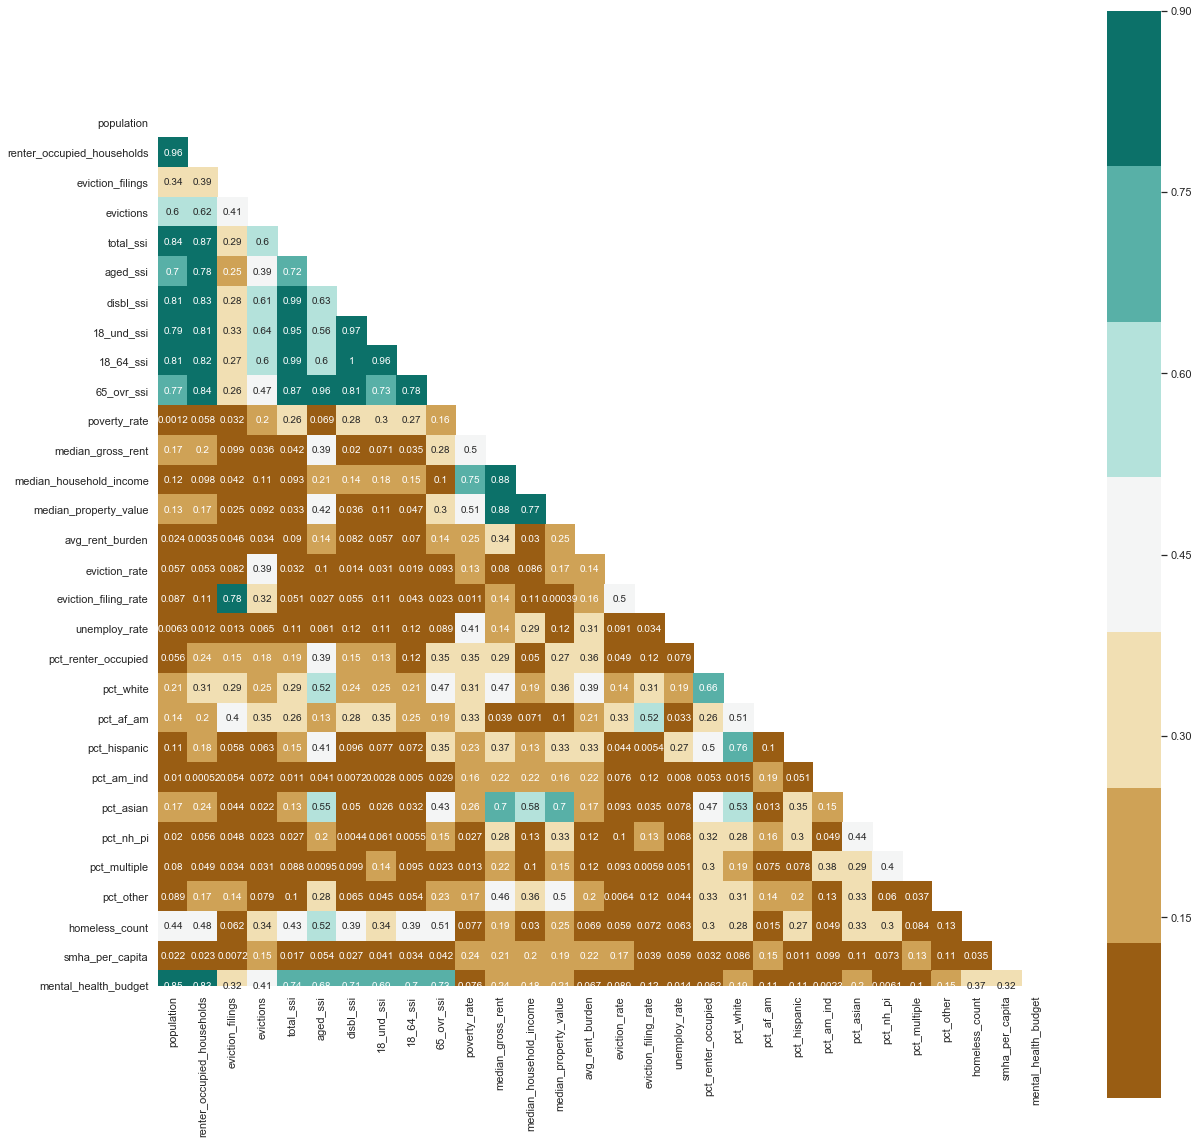

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
corr = df.corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,annot=True, mask=mask, vmax=.9, square=True, cmap= sns.color_palette("BrBG", 7))

In [8]:
df.columns

Index(['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', '18_und_ssi',
       '18_64_ssi', '65_ovr_ssi', 'poverty_rate', 'median_gross_rent',
       'median_household_income', 'median_property_value', 'avg_rent_burden',
       'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
       'homeless_count', 'smha_per_capita', 'mental_health_budget'],
      dtype='object')

In [9]:
df.rename({'18_und_ssi': 'juvenile_ssi', '18_64_ssi': 'adult_ssi','65_ovr_ssi': 'senior_ssi' }, axis=1, inplace=True)

In [10]:
graphs1 =df[['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi']]

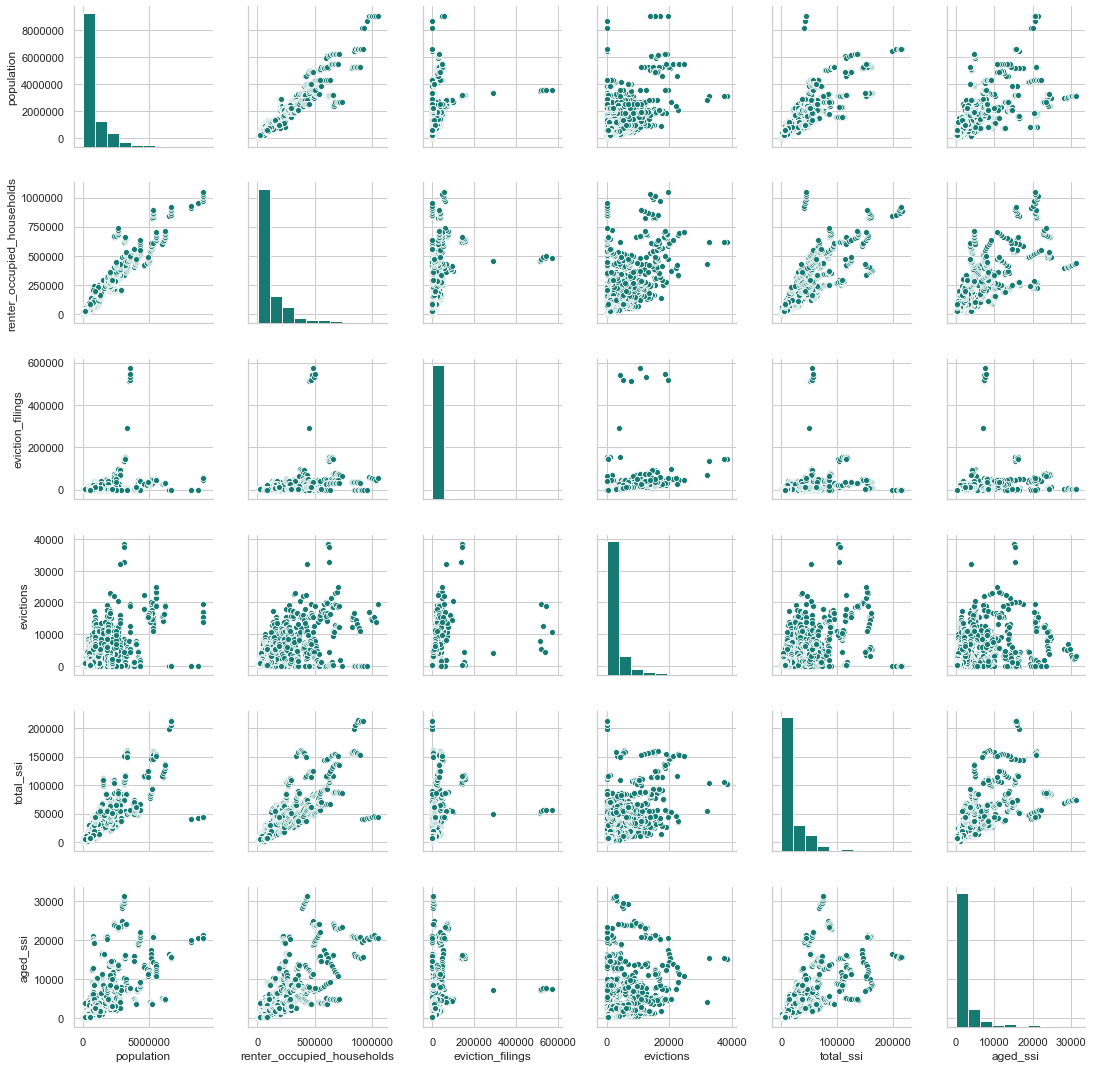

In [11]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs1)

In [12]:
graphs2 = df[['disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi', 'poverty_rate', 'median_gross_rent',
       'median_household_income']]

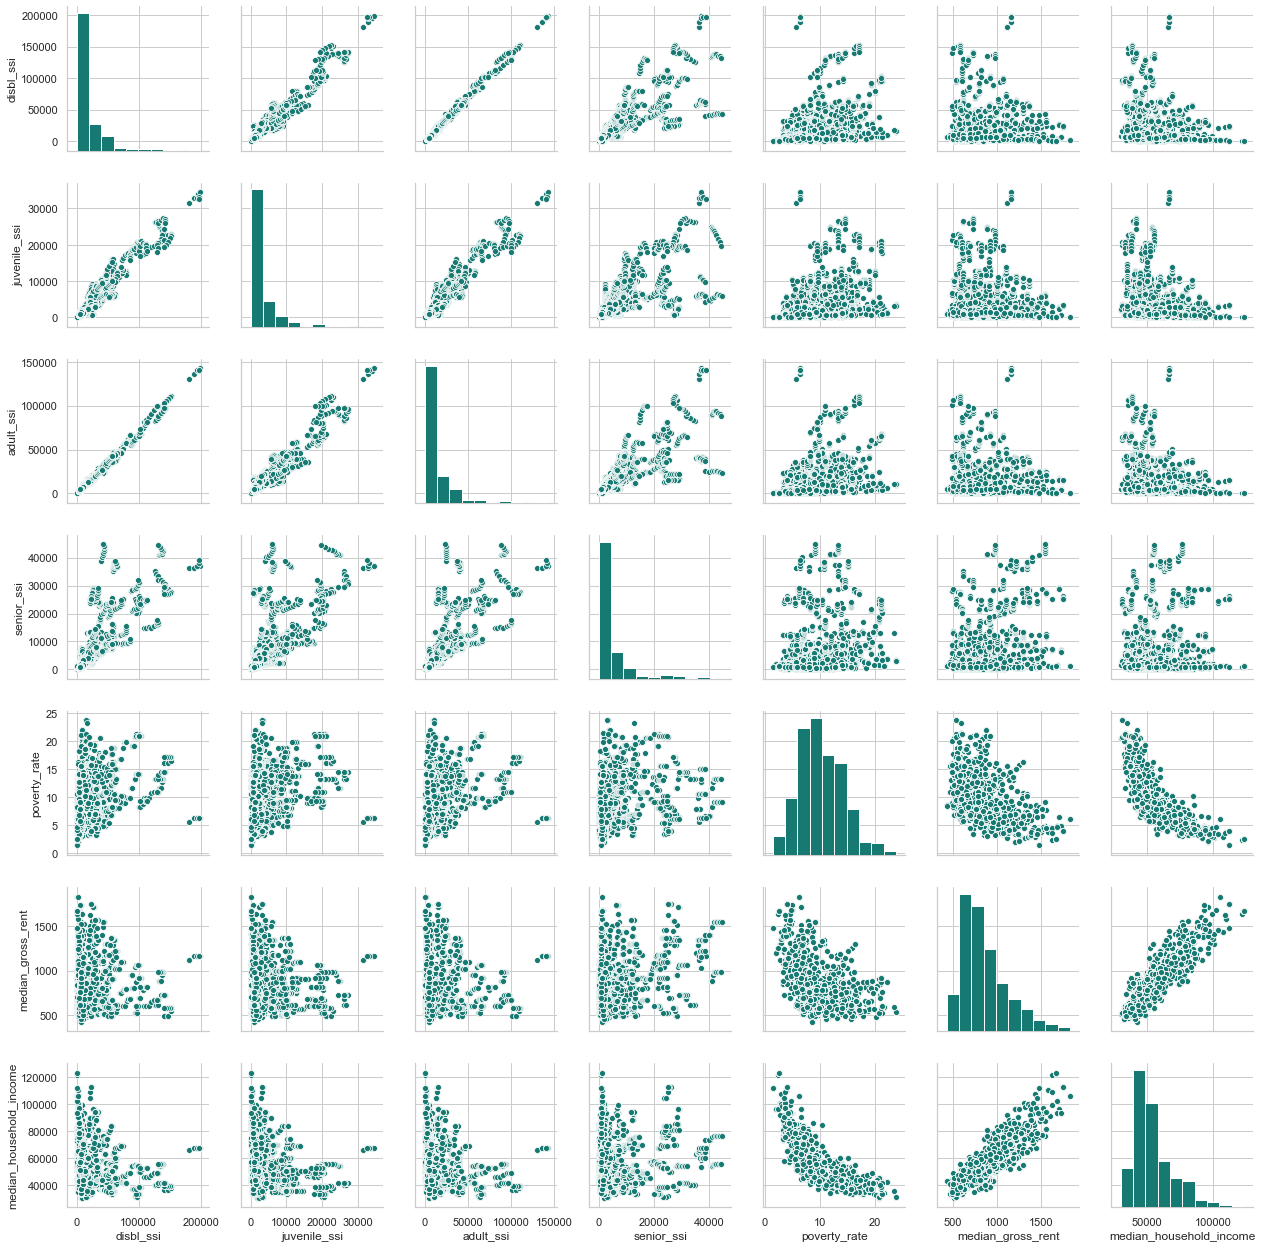

In [13]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs2)

In [14]:
graphs3 = df[['median_property_value', 'avg_rent_burden',
       'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied']]

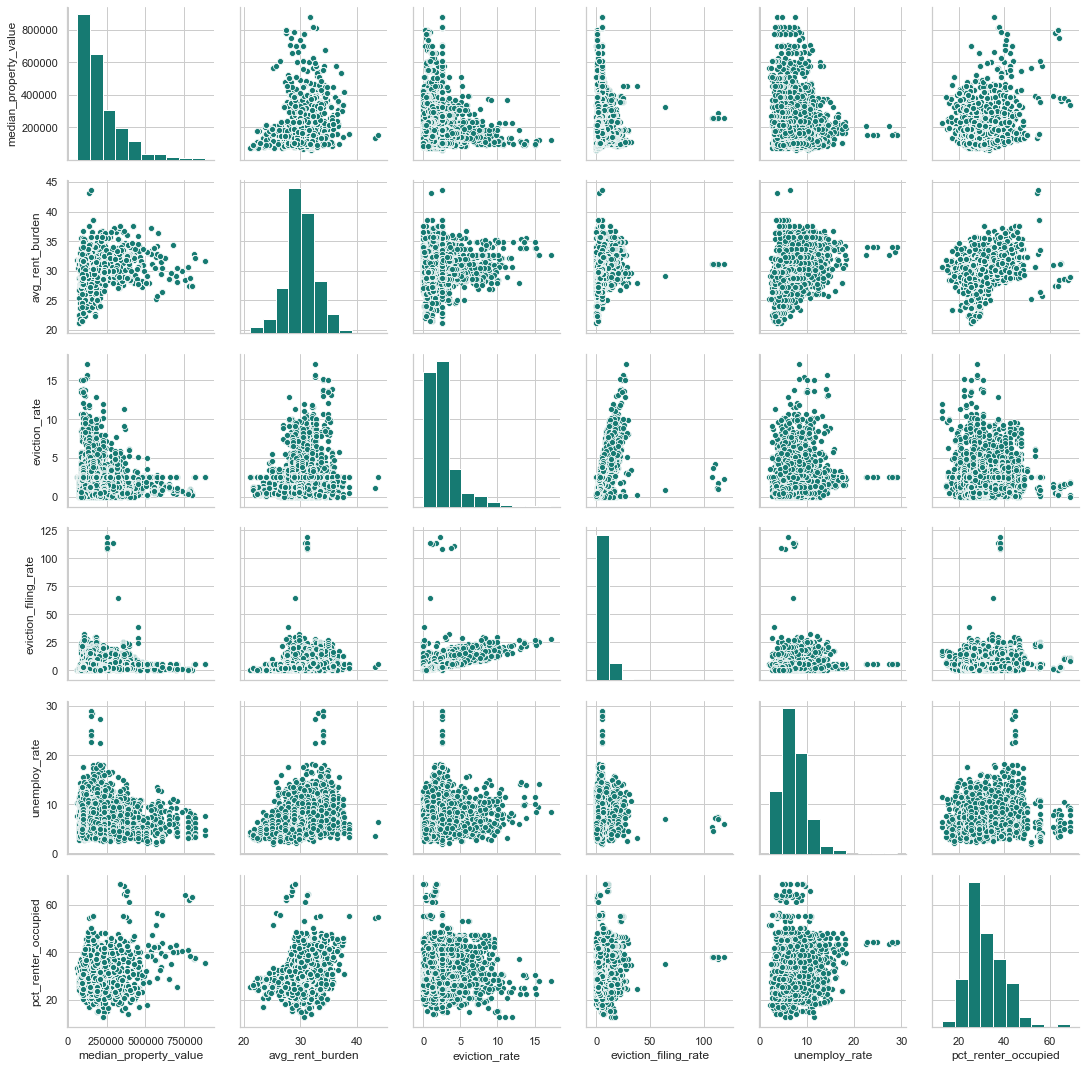

In [15]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs3)

In [16]:
graphs4 = df[['pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_multiple']]

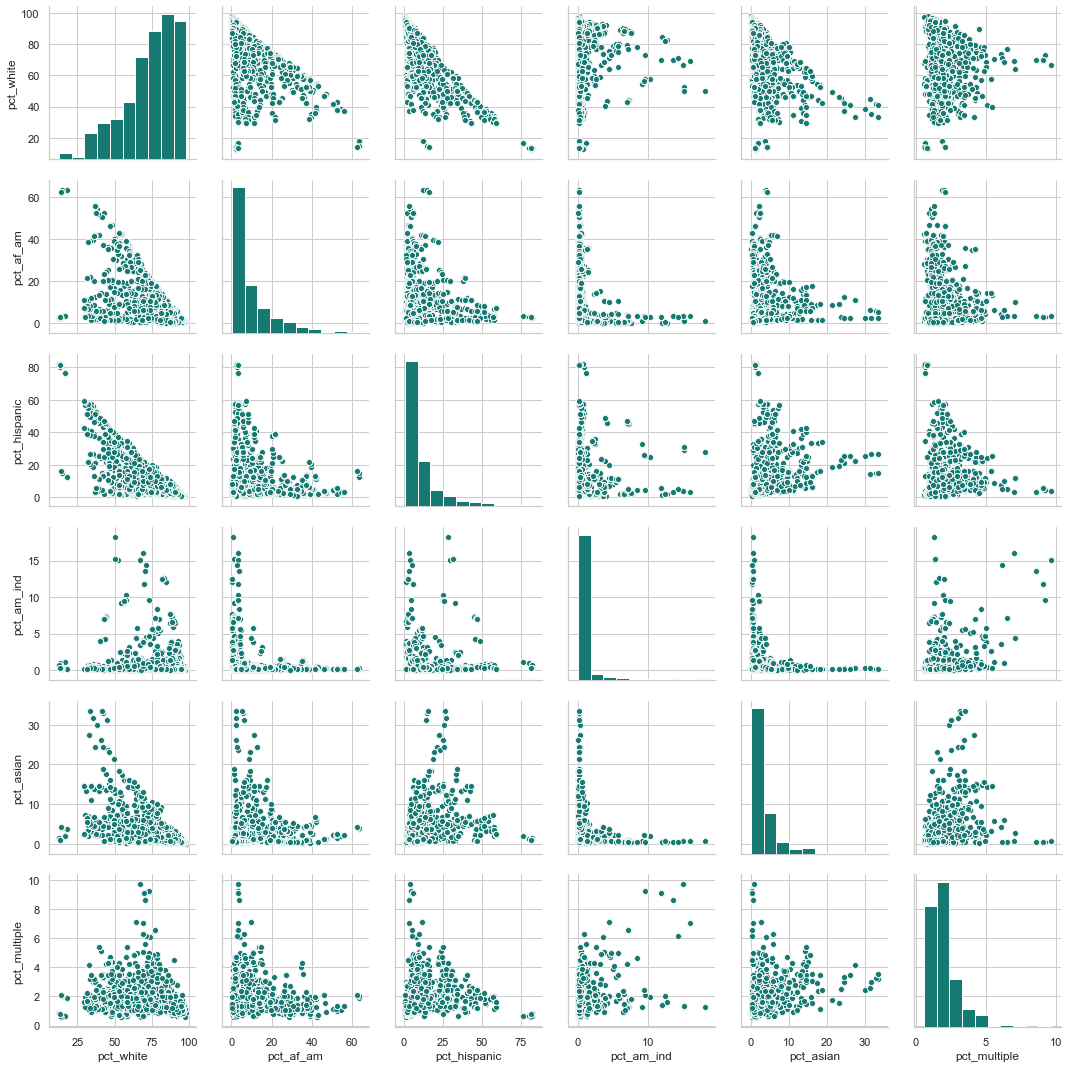

In [17]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs4)

In [18]:
graphs5 = df[['pct_other',
       'homeless_count', 'smha_per_capita', 'mental_health_budget']]

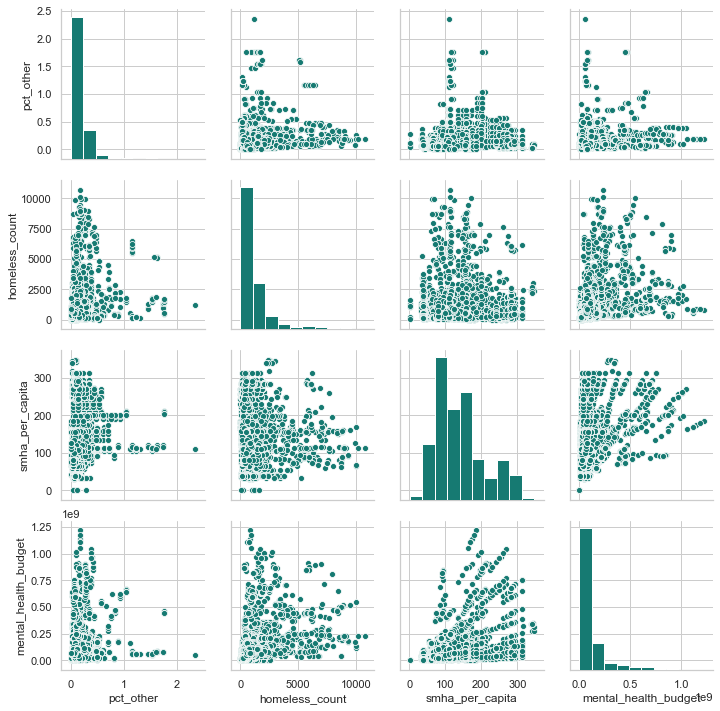

In [19]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs5)

## OLS, Linear Regression Model

In [20]:
outcome = 'homeless_count'

x_cols = ['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi', 'poverty_rate', 'median_gross_rent',
       'median_household_income', 'median_property_value', 'avg_rent_burden',
       'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
        'smha_per_capita', 'mental_health_budget']

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data= df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         homeless_count   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     82.86
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:55:55   Log-Likelihood:                -27132.
No. Observations:                3203   AIC:                         5.432e+04
Df Residuals:                    3173   BIC:                         5.451e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5.766e+05   2.48e+05     -2.325      0.020   -1.06e+06   -9.03e+04
population                    -0.0007      0.000     -6.532      0.000      -0.001      -0.001
renter_occupied_households     0.0066      0.001      7.361      0.000       0.005       0.008
eviction_filings              -0.0132      0.002     -7.289      0.000      -0.017      -0.010
evictions                      0.1048      0.010     10.644      0.000       0.085       0.124
total_ssi                      0.5560      0.388      1.433      0.152      -0.205       1.317
aged_ssi                       0.4267      0.088      4.869      0.000       0.255       0.598
disbl_ssi                     -0.0051      0.072     -0.071      0.943      -0.146       0.136
juvenile_ssi                  -0.6448      0.432     -1.492      0.136      -1.492       0.202
adult_ssi                     -0.4820      0.432     -1.116      0.264      -1.329       0.365
senior_ssi                    -0.8574      0.436     -1.967      0.049      -1.712      -0.003
poverty_rate                 -19.6499     13.003     -1.511      0.131     -45.145       5.845
median_gross_rent              2.5234      0.379      6.661      0.000       1.781       3.266
median_household_income       -0.0597      0.006    -10.070      0.000      -0.071      -0.048
median_property_value          0.0016      0.000      3.874      0.000       0.001       0.002
avg_rent_burden              -38.1716     12.183     -3.133      0.002     -62.060     -14.284
eviction_rate                -74.0999     17.728     -4.180      0.000    -108.860     -39.340
eviction_filing_rate          26.3091      8.048      3.269      0.001      10.529      42.090
unemploy_rate                 -2.8967      8.866     -0.327      0.744     -20.280      14.487
pct_renter_occupied          -21.1403      5.771     -3.663      0.000     -32.455      -9.825
pct_white                   5801.6071   2480.408      2.339      0.019     938.241    1.07e+04
pct_af_am                   5795.6764   2480.326      2.337      0.020     932.472    1.07e+04
pct_hispanic                5808.0759   2480.331      2.342      0.019     944.860    1.07e+04
pct_am_ind                  5842.4025   2480.342      2.355      0.019     979.166    1.07e+04
pct_asian                   5844.2733   2480.093      2.356      0.019     981.524    1.07e+04
pct_nh_pi                   6858.8669   2481.702      2.764      0.006    1992.965    1.17e+04
pct_multiple                5737.2127   2480.314      2.313      0.021     874.031    1.06e+04
pct_other                   5525.9584   2485.962      2.223      0.026     651.703    1.04e+04
smha_per_capita               -1.0426      0.452     -2.309      0.021      -1.928      -0.157
mental_health_budget        1.043e-06   3.3

In [21]:
# unemployment and disability_ssi have high p-vals

In [22]:
cols = ['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi','median_property_value', 
       'eviction_rate', 'eviction_filing_rate',
       'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
       'homeless_count','mental_health_budget']

In [23]:
len(cols)

23

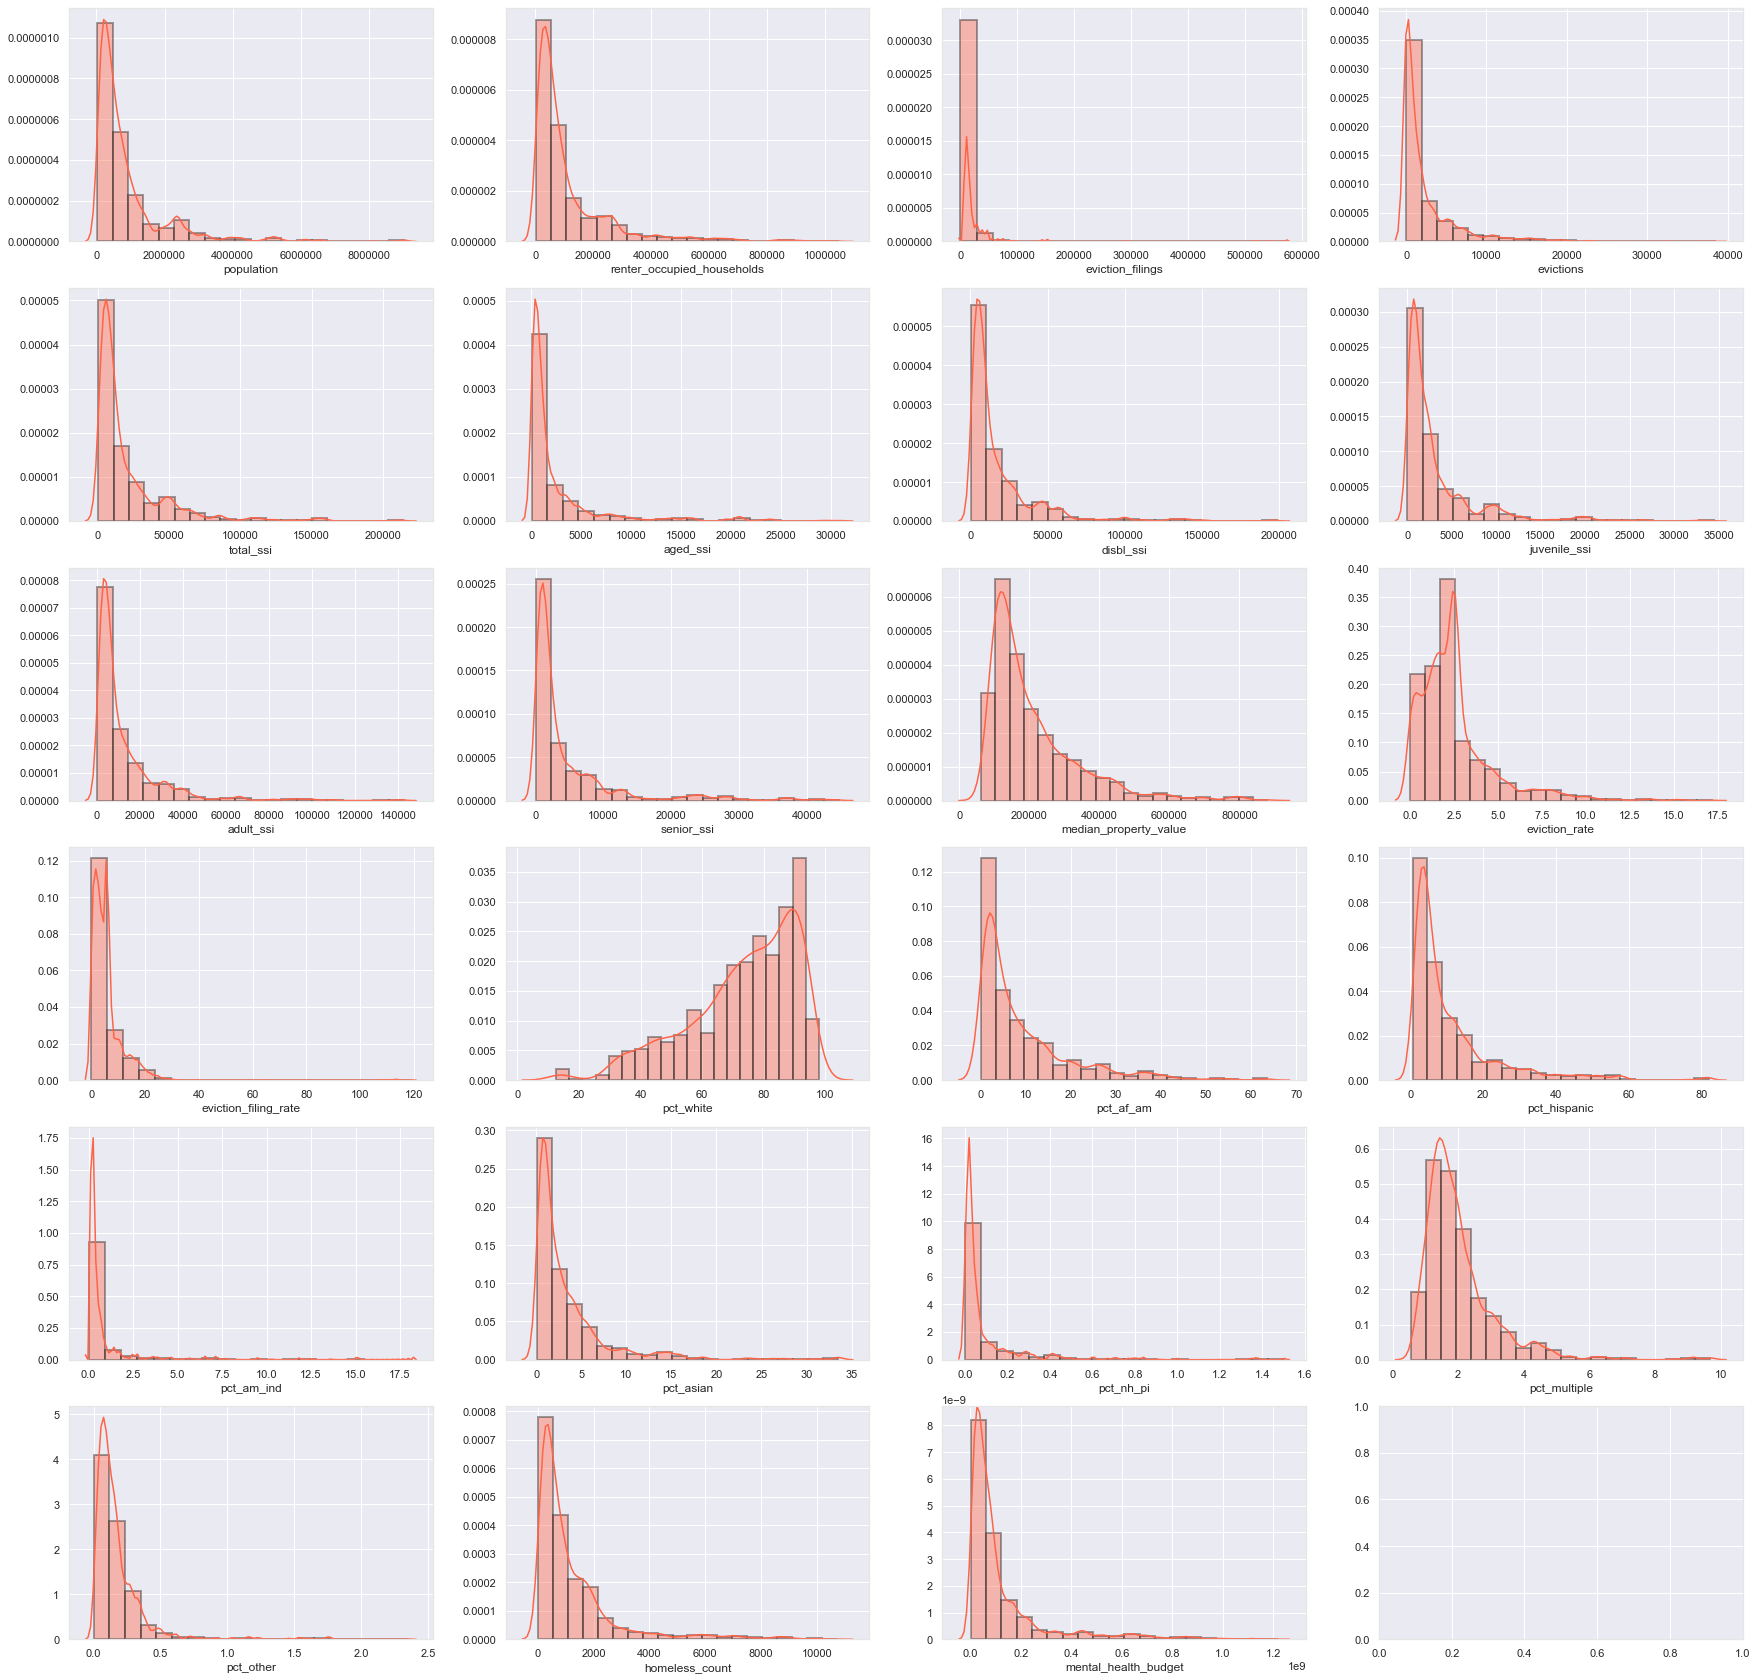

In [24]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(6,4,figsize = (30,30))
plt.rcParams["patch.force_edgecolor"] = True

col = ''
idx = 0
for i in range(0,6):
    for j in range(0,4):
    
        if idx < len(cols):
            col = cols[idx]
    
    
            position = ax[i][j]
            vis = sns.distplot(df[col],bins=20, color='tomato', 
                               hist_kws= dict(edgecolor="k", linewidth=2), ax=position)
        
            idx = idx + 1
    

In [25]:
df_x = df.copy() #for later use

### Determine if taking the log of each feature will improve the distribution

In [26]:
for col in cols:
    name = col+"_log"
    df[name] = np.log(df[col])

In [27]:
log_cols = ['population_log', 'renter_occupied_households_log','eviction_filings_log',
        'evictions_log', 'total_ssi_log',
       'aged_ssi_log', 'disbl_ssi_log', 'juvenile_ssi_log', 'adult_ssi_log',
       'senior_ssi_log', 'median_property_value_log', 'eviction_rate_log',
       'eviction_filing_rate_log', 'pct_white_log', 'pct_af_am_log',
       'pct_hispanic_log', 'pct_am_ind_log', 'pct_asian_log', 'pct_nh_pi_log',
       'pct_multiple_log', 'pct_other_log', 'homeless_count_log',
       'mental_health_budget_log']

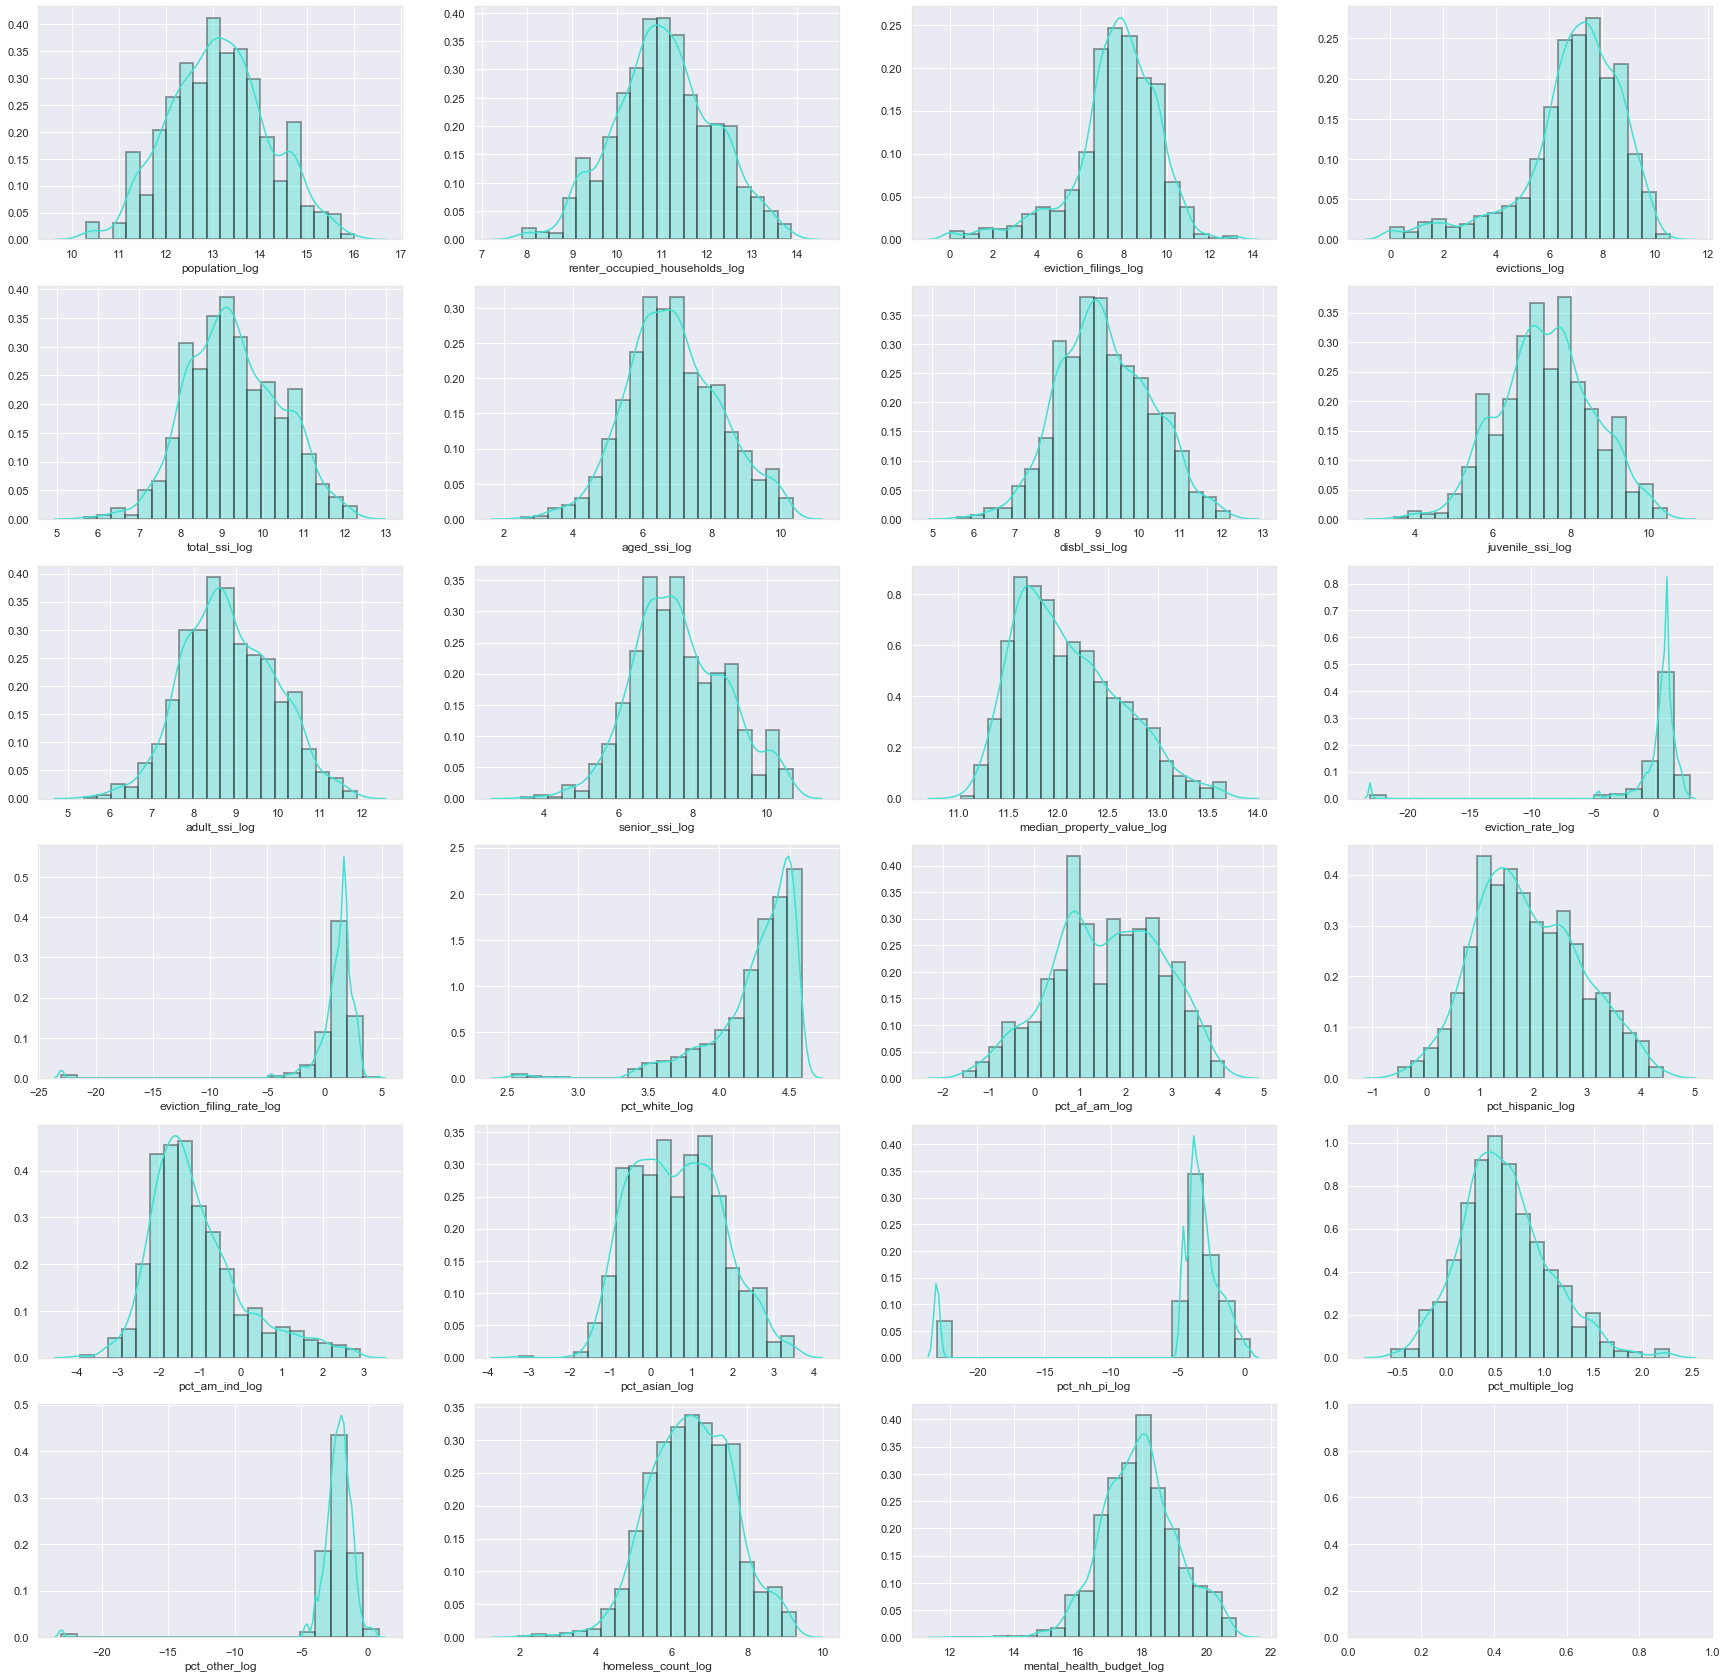

In [28]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(6,4,figsize = (30,30))
plt.rcParams["patch.force_edgecolor"] = True

c = ''
ix = 0
for i in range(0,6):
    for j in range(0,4):
    
        if ix < len(log_cols):
            c = log_cols[ix]
            position = ax[i][j]
            vis = sns.distplot((df[c][np.isfinite(df[c]) == True]), bins=20, color='turquoise',hist_kws= dict(edgecolor="k", linewidth=2), ax=position) 
            ix = ix + 1
    

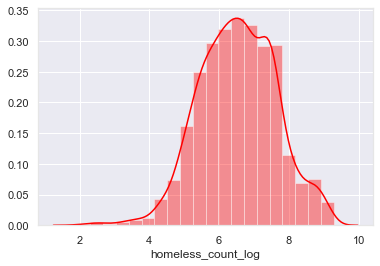

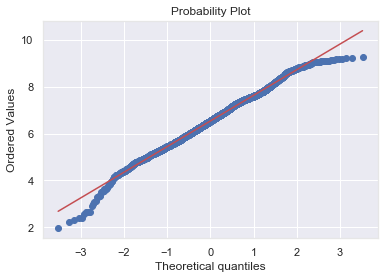

In [29]:
sns.distplot(df['homeless_count_log'],  bins=20, kde=True, color='red');
fig = plt.figure()
res = stats.probplot(df['homeless_count_log'], plot=plt) #outcome improved

not improved: eviction_rate_log, eviction_filing_rate_log, pct_white_log, pct_nh_pi_log, pct_other_log            

In [30]:
df.drop(['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi','median_property_value', 
       'eviction_rate_log', 'eviction_filing_rate','pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_multiple', 'pct_other_log',
       'homeless_count','mental_health_budget','pct_white_log','pct_nh_pi_log'], axis=1, inplace=True)

In [31]:
#test model after features were logged and dropped

In [32]:
df.columns

Index(['poverty_rate', 'median_gross_rent', 'median_household_income',
       'avg_rent_burden', 'eviction_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_nh_pi', 'pct_other',
       'smha_per_capita', 'population_log', 'renter_occupied_households_log',
       'eviction_filings_log', 'evictions_log', 'total_ssi_log',
       'aged_ssi_log', 'disbl_ssi_log', 'juvenile_ssi_log', 'adult_ssi_log',
       'senior_ssi_log', 'median_property_value_log',
       'eviction_filing_rate_log', 'pct_af_am_log', 'pct_hispanic_log',
       'pct_am_ind_log', 'pct_asian_log', 'pct_multiple_log',
       'homeless_count_log', 'mental_health_budget_log'],
      dtype='object')

In [33]:
def no_infinite(x):
    if x <= 0:
        x = 0.0000000001
    return x

In [34]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: no_infinite(x))

### Liner Regression Model (with logged features)

In [35]:
outcome = 'homeless_count_log'

x_cols = ['poverty_rate', 'median_gross_rent', 'median_household_income',
       'avg_rent_burden', 'eviction_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_nh_pi', 'pct_other',
       'smha_per_capita', 'population_log', 'renter_occupied_households_log',
       'eviction_filings_log', 'evictions_log', 'total_ssi_log',
       'aged_ssi_log', 'disbl_ssi_log', 'juvenile_ssi_log', 'adult_ssi_log',
       'senior_ssi_log', 'median_property_value_log',
       'eviction_filing_rate_log', 'pct_af_am_log', 'pct_hispanic_log',
       'pct_am_ind_log', 'pct_asian_log', 'pct_multiple_log',
       'mental_health_budget_log']

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data= df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     homeless_count_log   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:56:13   Log-Likelihood:                -3525.3
No. Observations:                3203   AIC:                             7111.
Df Residuals:                    3173   BIC:                             7293.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.5346      1.215     -1.263      0.207      -3.918       0.848
poverty_rate                      -0.0314      0.010     -3.251      0.001      -0.050      -0.012
median_gross_rent                  0.0011      0.000      4.733      0.000       0.001       0.002
median_household_income        -4.029e-05   4.13e-06     -9.757      0.000   -4.84e-05   -3.22e-05
avg_rent_burden                   -0.0607      0.008     -7.237      0.000      -0.077      -0.044
eviction_rate                      0.0137      0.010      1.340      0.180      -0.006       0.034
unemploy_rate                     -0.0071      0.006     -1.221      0.222      -0.018       0.004
pct_renter_occupied               -0.0045      0.006     -0.739      0.460      -0.017       0.007
pct_white                          0.0005      0.002      0.207      0.836      -0.004       0.005
pct_nh_pi                          0.3672      0.090      4.069      0.000       0.190       0.544
pct_other                         -0.3037      0.086     -3.522      0.000      -0.473      -0.135
smha_per_capita                   -0.0005      0.001     -0.886      0.376      -0.002       0.001
population_log                     0.0725      0.184      0.394      0.694      -0.288       0.433
renter_occupied_households_log     0.2081      0.158      1.316      0.188      -0.102       0.518
eviction_filings_log              -0.0225      0.012     -1.861      0.063      -0.046       0.001
evictions_log                      0.0416      0.013      3.261      0.001       0.017       0.067
total_ssi_log                     -0.8244      0.382     -2.159      0.031      -1.573      -0.076
aged_ssi_log                       0.3395      0.105      3.237      0.001       0.134       0.545
disbl_ssi_log                      1.0083      0.433      2.330      0.020       0.160       1.857
juvenile_ssi_log                  -0.2601      0.110     -2.372      0.018      -0.475      -0.045
adult_ssi_log                      0.1511      0.355      0.425      0.671      -0.546       0.848
senior_ssi_log                     0.0281      0.197      0.143      0.887      -0.359       0.415
median_property_value_log          0.5680      0.083      6.803      0.000       0.404       0.732
eviction_filing_rate_log           0.1732      0.026      6.781      0.000       0.123       0.223
pct_af_am_log                     -0.1112      0.027     -4.197      0.000      -0.163      -0.059
pct_hispanic_log                   0.0601      0.028      2.114      0.035       0.004       0.116
pct_am_ind_log                    -0.0675      0.037     -1.807      0.071      -0.141       0.006
pct_asian_log                      0.0305      0.040      0.771      0.441      -0.047       0.108
pct_multiple_l

### Polynomial Features

In [36]:
poly_df = df_x.copy()

In [37]:
#Train test split

target = poly_df['homeless_count']
features = poly_df.drop('homeless_count', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=27,test_size=0.2)

In [38]:
pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(X_train)
X_train_poly= pd.DataFrame(pf.transform(X_train), columns = pf.get_feature_names(features.columns))
X_test_poly= pd.DataFrame(pf.transform(X_test), columns = pf.get_feature_names(features.columns))

In [39]:
X_train_poly.head()

,population,renter_occupied_households,eviction_filings,evictions,total_ssi,aged_ssi,disbl_ssi,juvenile_ssi,adult_ssi,senior_ssi,...,pct_multiple^2,pct_multiple pct_other,pct_multiple smha_per_capita,pct_multiple mental_health_budget,pct_other^2,pct_other smha_per_capita,pct_other mental_health_budget,smha_per_capita^2,smha_per_capita mental_health_budget,mental_health_budget^2
0,355810.0,48307.0,656.0,267.0,16624.0,1540.0,15084.0,3382.0,9924.0,3318.0,...,0.6084,0.1482,53.04,1.887216e+07,0.0361,12.92,4597065.20,4624.0,1.645265e+09,5.854019e+14
1,1278842.0,186358.0,97.0,97.0,36107.0,2384.0,33723.0,6016.0,23568.0,6523.0,...,2.2801,0.1510,375.99,4.808318e+08,0.0100,24.90,31843165.80,62001.0,7.928948e+10,1.013987e+17
2,506763.0,83695.0,17564.0,5723.0,11384.0,988.0,10396.0,2486.0,7025.0,1873.0,...,3.6481,0.8977,301.78,1.529309e+08,0.2209,74.26,37632220.38,24964.0,1.265083e+10,6.410973e+15
3,955939.0,192460.0,13159.0,6784.0,43486.0,2431.0,41055.0,9769.0,27332.0,6385.0,...,5.5696,0.2596,257.24,2.459057e+08,0.0121,11.99,11461708.61,11881.0,1.135751e+10,1.085709e+16
4,2414359.0,286092.0,12301.0,3567.0,50036.0,3068.0,46835.0,9763.0,32035.0,8238.0,...,1.7424,0.0792,373.56,9.019079e+08,0.0036,16.98,40995815.82,80089.0,1.933636e+11,4.668491e+17


In [40]:
print(X_train_poly.shape, y_train.shape)
print(X_test_poly.shape, y_test.shape)

(2562, 464) (2562,)
(641, 464) (641,)


### Linear Regression Model - Polynomial Features

In [41]:
lm = linear_model.LinearRegression() #Regression with Interaction Features

In [42]:
lm.fit(X_train_poly, y_train)
y_train_pred = lm.predict(X_train_poly)

In [43]:
print("R2: %.2f" % r2_score(y_train, y_train_pred)) #could be overfitting 

R2: 0.86


In [44]:
y_test_pred = lm.predict(X_test_poly)

In [45]:
print("R2: %.2f" % r2_score(y_test, y_test_pred))

R2: 0.59


###  Logged Polynomial Features

In [46]:
log_poly_df = df.copy()

In [47]:
#Train test split
target_1 = df['homeless_count_log']
features_1 = df.drop('homeless_count_log', axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(features_1, target_1, random_state=2,test_size=0.2)

In [48]:
pol = PolynomialFeatures(degree=2, include_bias=False)
pol.fit(X_train)
Xtrain_log= pd.DataFrame(pol.transform(Xtrain), columns = pol.get_feature_names(features_1.columns))
Xtest_log= pd.DataFrame(pol.transform(Xtest), columns = pol.get_feature_names(features_1.columns))

In [49]:
print(Xtrain_log.shape, ytrain.shape)
print(Xtest_log.shape, ytest.shape)

(2562, 464) (2562,)
(641, 464) (641,)


### Linear Regression Model - Logged Polynomial Features

In [50]:
linreg = linear_model.LinearRegression()

In [51]:
linreg.fit(Xtrain_log, ytrain)
ytrain_pred = linreg.predict(Xtrain_log)

In [52]:
print("R2: %.2f" % r2_score(ytrain, ytrain_pred)) 

R2: 0.88


In [53]:
ytest_pred = linreg.predict(Xtest_log)

In [54]:
print("R2: %.2f" % r2_score(ytest, ytest_pred)) 

R2: 0.65


# Feature Selection

In [55]:
#Using Correlation Matrix to eliminate multicollinearity

In [56]:
corr_matrix = Xtrain_log.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [57]:
len(Xtrain_log.columns)

464

In [58]:
len(to_drop)

362

In [59]:
Xtrain_log.drop(to_drop, axis=1, inplace=True)

In [60]:
Xtest_log.drop(to_drop, axis=1, inplace=True)

In [61]:
Xtrain_log.shape

(2562, 102)

### Linear Regression - correlated features dropped

In [62]:
lm = linear_model.LinearRegression()

In [63]:
lm.fit(Xtrain_log, ytrain)

y_train_pred = lm.predict(Xtrain_log)


In [64]:
print("R2: %.2f" % r2_score(ytrain, y_train_pred))


R2: 0.66


In [65]:
#Scale and use regularization to eliminate features

In [66]:
def run_model(model,X_train,X_test,y_train,y_test):
    
    print('Training R^2 :',model.score(X_train,y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :',model.score(X_test,y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

In [67]:
scalar = StandardScaler()
scalar.fit(Xtrain_log)
X_train_scaled  = scalar.transform(Xtrain_log)
X_test_scaled = scalar.transform(Xtest_log)

In [68]:
lasso = LassoCV(max_iter=100,cv=10)
lasso.fit(X_train_scaled, ytrain)
run_model(lasso ,X_train_scaled, X_test_scaled, ytrain, ytest)
print("The optimal alpha for the Lasso Regression is: ",lasso.alpha_)

Training R^2 : 0.6515355816930837
Training Root Mean Square Error 0.6549156575422852

----------------

Testing R^2 : 0.6177098083894998
Testing Root Mean Square Error 0.6533299446942411
The optimal alpha for the Lasso Regression is:  0.000741780909264495


In [69]:
coeff_used = np.sum(lasso.coef_!=0)
print("Number of coefs: ", len(lasso.coef_))
print("Number at 0: ", sum(abs(lasso.coef_) < 10**(-10)))
print("Number of coef used: ",coeff_used)
print("Percent reduced: ", sum(abs(lasso.coef_) < 10**(-10))/135)
#Lasso did not remove features 

Number of coefs:  102
Number at 0:  3
Number of coef used:  99
Percent reduced:  0.022222222222222223


In [70]:
cols = Xtrain_log.columns[(lasso.coef_ != 0).tolist()]

In [71]:
X_train_scaled = Xtrain_log[cols]
X_test_scaled = Xtest_log[cols]

# Hyper Parameter Tuning and Model Selection

### Linear Regression Model - SKlearn

In [72]:
lin_reg = linear_model.LinearRegression()

In [73]:
lin_reg.fit(X_train_scaled,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
y_tr_pred = lin_reg.predict(X_train_scaled)

In [75]:
y_te_pred = lin_reg.predict(X_test_scaled)

In [76]:
print("R2: %.2f" % r2_score(ytrain, y_tr_pred))
print("MSE: %.2f" % mean_squared_error(ytrain, y_tr_pred))
print('\n')
print("R2: %.2f" % r2_score(ytest, y_te_pred))
print("MSE: %.2f" % mean_squared_error(ytest, y_te_pred))

R2: 0.66
MSE: 0.41


R2: 0.63
MSE: 0.42


###  Decision Tree Regression

In [96]:
regressor = DecisionTreeRegressor(random_state = 0)

In [97]:
regressor.fit(X_train_scaled, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [98]:
y_train_predict = regressor.predict(X_train_scaled)

In [99]:
print("R2: %.2f" % r2_score(ytrain, y_train_predict))  #overfitting

R2: 1.00


In [100]:
#Regression Tree using Grid Search
parameters={ 'min_samples_leaf' : range(5,200,15), 'max_depth': range(2,20,2)}

In [101]:
reg_tree = DecisionTreeRegressor(random_state = 0)
grid_tree= GridSearchCV(reg_tree, parameters, cv=5)
grid_tree.fit(X_train_scaled, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(5, 200, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [102]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.8360823986695587
{'max_depth': 18, 'min_samples_leaf': 5}
DecisionTreeRegressor(criterion='mse', max_depth=18, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [103]:
y_pred_tree = grid_tree.best_estimator_.predict(X_test_scaled)

In [104]:
print("r2_score:",metrics.r2_score(ytest, y_pred_tree))
print("MSE:",metrics.mean_squared_error(ytest, y_pred_tree))

r2_score: 0.8048577619034996
MSE: 0.21788295379549466


### Random Forest Regressor

In [105]:
#Using Grid Search 
parameterz={'max_depth': range(2,20,2),'n_estimators': (10, 50, 100, 1000)}

In [106]:
reg_for = RandomForestRegressor(random_state = 0)

In [107]:
grid_forest = GridSearchCV(reg_for, parameterz, cv=5)

In [108]:
grid_forest.fit(X_train_scaled, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 20, 2),
    

In [109]:
print(grid_forest.best_score_)
print(grid_forest.best_params_)
print(grid_forest.best_estimator_)

0.9120070165975139
{'max_depth': 18, 'n_estimators': 1000}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


In [110]:
y_pred_forest = grid_forest.best_estimator_.predict(X_test_scaled)

In [111]:
print("r2_score:",metrics.r2_score(ytest, y_pred_forest))

r2_score: 0.9324149338278518


In [112]:
#run model again with best parameters

In [113]:
r_forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [114]:
r_forest.fit(X_train_scaled, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [115]:
predict_train = r_forest.predict(X_train_scaled)

In [116]:
predict_forest = r_forest.predict(X_test_scaled)

In [117]:
print("r2_training_score:", metrics.r2_score(ytrain,predict_train))

r2_training_score: 0.9900259927069511


In [118]:
print("r2__validation_score:",metrics.r2_score(ytest, predict_forest))

r2__validation_score: 0.9324149338278518


In [119]:
print("MSE:",metrics.mean_squared_error(ytest, predict_forest))

MSE: 0.0754610277800011


In [120]:
r_forest.feature_importances_

array([3.98090570e-03, 3.71076585e-03, 6.18415938e-03, 4.60985247e-03,
       1.32367904e-03, 1.65990692e-02, 4.44117857e-03, 2.97360544e-02,
       1.65375002e-03, 2.45494099e-03, 8.82003451e-02, 5.87159788e-03,
       4.41569647e-01, 7.74738870e-03, 1.25574811e-03, 5.81694964e-03,
       4.36599328e-03, 5.88755735e-04, 3.46883695e-03, 1.75932477e-03,
       1.51811330e-02, 3.06723687e-03, 1.97527161e-03, 1.85193662e-03,
       2.59908030e-03, 6.15615840e-03, 4.15130535e-03, 8.12283118e-03,
       3.64941558e-03, 3.45205345e-03, 4.88681416e-03, 4.16676401e-03,
       9.20340103e-03, 1.51068301e-03, 4.20957753e-03, 3.58775195e-03,
       2.99406503e-03, 3.50555802e-03, 4.13002898e-03, 3.71979882e-03,
       1.39390335e-03, 6.75649701e-03, 1.77457175e-03, 2.76613777e-03,
       2.82614400e-03, 3.10718609e-03, 1.01135452e-02, 1.06105461e-03,
       1.73968318e-03, 2.25220166e-03, 1.68692455e-03, 2.20526777e-03,
       2.09666188e-03, 1.23823127e-03, 1.58372251e-03, 2.91896062e-03,
      

In [121]:
feature_importances = pd.DataFrame(r_forest.feature_importances_, index = X_train_scaled.columns, columns=['importance']).sort_values('importance',ascending=False)

In [122]:
feature_importances[0:11]

,importance
aged_ssi_log,0.441570
population_log,0.088200
population_log median_property_value_log,0.052895
pct_nh_pi,0.029736
pct_renter_occupied pct_white,0.023319
pct_white smha_per_capita,0.022918
pct_renter_occupied,0.016599
mental_health_budget_log,0.015181
smha_per_capita pct_af_am_log,0.013606
eviction_rate pct_hispanic_log,0.010114


### XGBoost with Regression

In [80]:
parameters_xgb = { 'max_depth':[ 3, 4, 5, 6, 8, 10, 12, 15],
   'gamma':[1.0],
   'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
   'subsample':[0.05], 'min_child_weight': [ 1, 3, 5, 7 ], 'n_jobs':[4]}

In [78]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

In [81]:
xgb_reg = GridSearchCV(xgb_model, parameters_xgb, cv=5)

In [82]:
xgb_reg.fit(X_train_scaled, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_st...eg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [1.0],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                

In [83]:
print(xgb_reg.best_score_)
print(xgb_reg.best_params_)
print(xgb_reg.best_estimator_)

0.7348587523529546
{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_jobs': 4, 'subsample': 0.05}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.05, verbosity=1)


In [84]:
y_pred_xgb = xgb_reg.best_estimator_.predict(X_test_scaled)

In [86]:
print("r2_score:",metrics.r2_score(ytest, y_pred_xgb))

r2_score: 0.7368385411771634


In [90]:
xgb_ = xgb.XGBRegressor(objective ='reg:squarederror',gamma= 1.0, learning_rate= 0.1, max_depth= 6, min_child_weight= 1, n_jobs= 4, subsample= 0.05)

In [91]:
xgb_.fit(X_train_scaled, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.05, verbosity=1)

In [93]:
y_p = xgb_.predict(X_test_scaled)

In [94]:
print("r2_score:",metrics.r2_score(ytest, y_p))

r2_score: 0.7368385411771634


In [95]:
print("MSE:",metrics.mean_squared_error(ytest, y_p))

MSE: 0.293828729919027
